# Johns Hopkins University COVID-19 data viewer
Reads the time series csv data available from here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

The CSV files:
 - time_series_covid19_confirmed_global.csv
 - time_series_covid19_deaths_global.csv
 - time_series_covid19_recovered_global.csv


Useful methods:
 - loadData(path = ''): parses the CSV files stored in the given location and generates dictionaries with the relevant time series. If no path is given it downloads the files into the current working directory
 and then reads them.
 - getData(country, province = ''): returns a self-explanatory dict with data for specified country and province
 - getCountries(): returns names of all contries on which there have data
 - getProvinces(country): returns names of provinces for given country
 - estimateTrueCases(country, province = '', fatalityRate = 0.01, timeToDeath = 17.3): returns estimate of true case count based on fatality rate and average time from infection to death (https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca)
 


In [35]:
import sys
import importlib

sys.path.append("/Users/karel/software/JHUreader/")
import readerJHU as reader
importlib.reload(reader)

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [36]:
# download data and load it into the jhu, the csv files are saved in the current working directory
jhu = reader.CovidData()
jhu.loadData()

# to load  local data uncomment the lines below:
#path = '/your/path/to/the/csv/files/'
#jhu.loadData(path)

## Plot some data

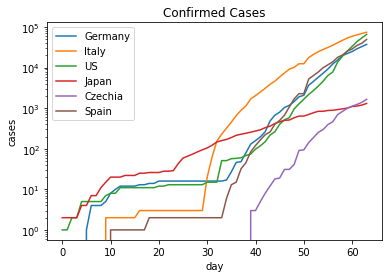

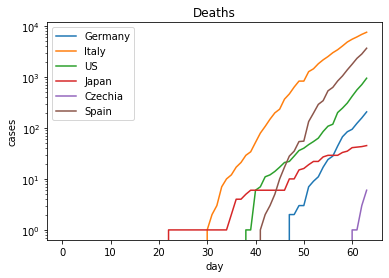

In [37]:
# plot confirmed cases for several countries
countries = ['Germany', 'Italy',  'US', 'Japan', 'Czechia', 'Spain']


for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['confirmed'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Confirmed Cases')
plt.show()

# plot numbers of dead for the same countries
for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['dead'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Deaths')
plt.show()

## True case estimate for the UK

Estimate true case count from the fatality count

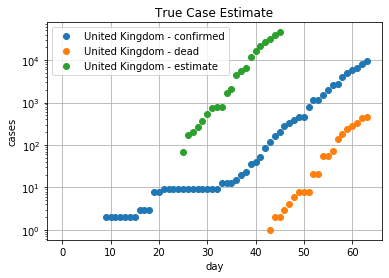

In [38]:
country = 'United Kingdom'
data = jhu.getData(country)
estimate = jhu.estimateTrueCases(country)

plt.semilogy(data['confirmed'],"o", label = data['country'] + ' - confirmed')
plt.semilogy(data['dead'],"o", label = data['country'] + ' - dead')
plt.semilogy(estimate['estimate'],"o", label = estimate['country'] + ' - estimate')

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('True Case Estimate')
plt.grid()
plt.show()


In [39]:
# have a look at data for one country 
data = jhu.getData('Spain')
for key in data.keys():
    print(key)
    print(data[key])
    print()

country
Spain

province


confirmed
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 13.0, 15.0, 32.0, 45.0, 84.0, 120.0, 165.0, 222.0, 259.0, 400.0, 500.0, 673.0, 1073.0, 1695.0, 2277.0, 2277.0, 5232.0, 6391.0, 7798.0, 9942.0, 11748.0, 13910.0, 17963.0, 20410.0, 25374.0, 28768.0, 35136.0, 39885.0, 49515.0]

dead
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 5.0, 10.0, 17.0, 28.0, 35.0, 54.0, 55.0, 133.0, 195.0, 289.0, 342.0, 533.0, 623.0, 830.0, 1043.0, 1375.0, 1772.0, 2311.0, 2808.0, 3647.0]

recovered
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.

In [40]:
# available countries
print(jhu.getCountries())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [41]:
# provinces in China
print(jhu.getProvinces('China'))

['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']
